# Loading packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

#from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
#from fastai.tabular import *
#from fastai.imports import *
# Import scipy
from scipy.stats import boxcox
from scipy import stats

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [3]:
# Dataset is now stored in a Pandas Dataframe
df = pd.read_csv('dataCOMP0050Coursework1.csv')
df.head()

,loan_amnt,term,installment,emp_length,home_ownership,verification_status,issue_d,purpose,dti,earliest_cr_line,...,pub_rec,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off
0,5675,36,189.56,2.0,RENT,Source Verified,14-Dec,car,15.55,1992,...,0,15.0,15,Individual,0.0,0.0,4.698979,697.0,3.464936,0
1,7000,36,242.63,1.0,RENT,Source Verified,14-Dec,car,6.78,2002,...,0,69.2,5,Individual,0.0,0.0,4.301052,717.0,3.431364,0
2,3500,36,116.24,10.0,MORTGAGE,Not Verified,14-Dec,car,10.65,1997,...,0,12.6,35,Individual,2.0,0.0,4.681250,742.0,3.765520,0
3,10000,36,316.47,10.0,MORTGAGE,Not Verified,14-Dec,car,21.74,1996,...,0,23.7,22,Individual,4.0,0.0,4.875067,707.0,3.424555,0
4,1500,36,46.31,2.0,OWN,Not Verified,14-Dec,car,12.17,1997,...,0,46.5,13,Individual,2.0,0.0,4.812920,712.0,4.448211,0


In [6]:
#Printing out unique values in each column
col=df.columns
print(df.apply(lambda col: col.unique()))

loan_amnt               [5675, 7000, 3500, 10000, 1500, 8000, 2500, 15...
term                                                             [36, 60]
installment             [189.56, 242.63, 116.24, 316.47, 46.31, 267.21...
emp_length              [2.0, 1.0, 10.0, 0.0, 6.0, 7.0, 9.0, nan, 4.0,...
home_ownership                                      [RENT, MORTGAGE, OWN]
verification_status             [Source Verified, Not Verified, Verified]
issue_d                 [14-Dec, 14-Nov, 14-Oct, 14-Sep, 14-Aug, 14-Ju...
purpose                                                             [car]
dti                     [15.55, 6.78, 10.65, 21.74, 12.17, 26.9, 19.58...
earliest_cr_line        [1992, 2002, 1997, 1996, 2005, 1985, 2000, 199...
open_acc                [7, 3, 16, 8, 26, 13, 30, 11, 6, 12, 14, 10, 9...
pub_rec                                   [0, 1, 2, 4, 3, 5, 6, 7, 8, 12]
revol_util              [15.0, 69.2, 12.6, 23.7, 46.5, 64.4, 40.4, 31....
total_acc               [15, 5, 35, 22

Here are what the columns represent:

**The variable of interest is charged_off, which takes value 1 if a debtor is not repaying the loan (0 otherwise).
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [7]:
df.describe()

,loan_amnt,term,installment,emp_length,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,charged_off
count,8929.000000,8929.000000,8929.000000,8504.000000,8929.000000,8929.000000,8929.000000,8929.000000,8915.000000,8929.000000,7173.000000,8912.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,8588.629746,40.373166,262.961752,5.259878,14.233822,1999.016463,9.806137,0.195319,40.554445,22.151305,1.539244,0.123205,4.755638,710.746836,3.659418,0.147945
std,6059.496367,9.265043,181.985130,3.656832,8.536308,7.486955,4.972138,0.568884,26.612105,11.663117,2.016116,0.384692,0.247165,39.842970,0.779071,0.355065
min,1000.000000,36.000000,21.740000,0.000000,0.000000,1958.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.477266,662.000000,0.000000,0.000000
25%,4600.000000,36.000000,140.790000,2.000000,7.700000,1995.000000,6.000000,0.000000,18.200000,13.000000,0.000000,0.000000,4.602071,677.000000,3.429106,0.000000
50%,7000.000000,36.000000,213.550000,5.000000,13.220000,2000.000000,9.000000,0.000000,37.900000,21.000000,1.000000,0.000000,4.763435,702.000000,3.785259,0.000000
75%,10800.000000,36.000000,330.140000,10.000000,19.990000,2004.000000,12.000000,0.000000,61.100000,29.000000,3.000000,0.000000,4.909829,737.000000,4.093597,0.000000
max,40000.000000,60.000000,1329.440000,10.000000,94.320000,2014.000000,84.000000,12.000000,145.800000,124.000000,19.000000,6.000000,6.964966,847.500000,5.633197,1.000000


# Data cleaning and pre-processing 

* Created two separate pipelines to handle different types of data that is num_transformer which handles the missing numbers using simple imputer while the standard scaler will transform the data such that its distribution will have a mean value 0 and standard deviation of 1.
* In cat_transformer I have used simple imputer and one hot encoder to encode the categories

In [8]:
#Split the dataset into train and test using a 70:30 ratio
train=df.iloc[:round(len(df)*0.7),:]
test=df.iloc[round(len(df)*0.7):,:]
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [9]:
num_features = train.iloc[:,:-1].select_dtypes(include=['int64', 'float64']).columns
cat_features= train.iloc[:,:-1].select_dtypes(include=['object', 'bool']).columns

In [10]:
num_si_step=("si",SimpleImputer(strategy="mean"))
num_scale_step=("scale",StandardScaler())

num_steps=[num_si_step,num_scale_step]
num_pipe=Pipeline(num_steps)

cat_si_step = ('si', SimpleImputer(strategy='most_frequent'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe=Pipeline(cat_steps)


In [11]:
cat_ordinal_step = ('ordinal', OrdinalEncoder())
cat_steps2 = [cat_si_step, cat_ordinal_step]
cat_pipe2=Pipeline(cat_steps2)

In [12]:
transformers2 = [('num', num_pipe, num_features),('cat', cat_pipe2, cat_features)]
preprocessor2 = ColumnTransformer(transformers=transformers2,remainder='passthrough')

In [13]:
num_transformer_tree = Pipeline([('imputer',SimpleImputer(strategy='mean'))])

transformers_tree = [('num', num_transformer_tree, num_features),('cat', cat_pipe2, cat_features)]
preprocessor_tree2 = ColumnTransformer(transformers=transformers_tree,remainder='passthrough')

In [14]:
transformers = [('num', num_pipe, num_features),('cat', cat_pipe, cat_features)]
preprocessor = ColumnTransformer(transformers=transformers,remainder='passthrough')


In [15]:
num_transformer_tree = Pipeline([('imputer',SimpleImputer(strategy='mean'))])
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', num_transformer_tree, num_features),
        ('cat', cat_pipe, cat_features)],remainder='passthrough')

In [18]:
#Apply pipeline of pre-processing steps
X_test_base= pd.DataFrame(preprocessor2.fit_transform(X_test))
X_train_base= pd.DataFrame(preprocessor2.fit_transform(X_train))

In [19]:
df1_temp=X_train_base.iloc[:,:len(num_features)]
df1_temp.columns=num_features
df2_temp=X_train_base.iloc[:,len(num_features):]

df2_temp.columns=cat_features


In [21]:
X_train_base=pd.concat([df1_temp,df2_temp],axis=1)
X_train_base.head()

,loan_amnt,term,installment,emp_length,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,home_ownership,verification_status,issue_d,purpose,application_type
0,-0.483950,-0.4847,-0.401658,-0.899247,0.177203,-0.904353,-0.548458,-0.34392,-0.994462,-0.610414,-0.864777,-0.316297,-0.213608,-0.337237,-0.245093,2.0,1.0,39.0,0.0,0.0
1,-0.263471,-0.4847,-0.109667,-1.179117,-0.866371,0.440834,-1.359162,-0.34392,1.040206,-1.463711,-0.864777,-0.316297,-1.836050,0.167488,-0.287846,2.0,1.0,39.0,0.0,0.0
2,-0.845867,-0.4847,-0.805064,1.339714,-0.405866,-0.231760,1.275627,-0.34392,-1.084558,1.096179,0.270628,-0.316297,-0.285891,0.798394,0.137677,0.0,0.0,39.0,0.0,0.0
3,0.235725,-0.4847,0.296601,1.339714,0.913773,-0.366278,-0.548458,-0.34392,-0.667864,-0.013107,1.406033,-0.316297,0.504345,-0.084875,-0.296516,0.0,0.0,39.0,0.0,0.0
4,-1.178665,-0.4847,-1.189819,-0.899247,-0.224995,-0.231760,-0.345782,-0.34392,0.188048,-0.781074,0.270628,-0.316297,0.250957,0.041307,1.007034,1.0,0.0,39.0,0.0,0.0


In [22]:
df1_test=X_test_base.iloc[:,:len(num_features)]
df2_test=X_test_base.iloc[:,len(num_features):]
df1_test.columns=num_features
df2_test.columns=cat_features

In [23]:
X_test_base=pd.concat([df1_test,df2_test],axis=1)
X_test_base.head()

,loan_amnt,term,installment,emp_length,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,log_revol_bal,home_ownership,verification_status,issue_d,purpose,application_type
0,-1.117901,-0.442096,-1.112684,-0.385166,-0.212789,0.171691,-0.601724,-0.348524,2.195041,0.681250,0.225550,-0.331058,0.933084,-1.231071,0.173055,0.0,0.0,2.0,0.0,0.0
1,-0.615721,-0.442096,-0.638467,-1.510153,-0.478006,-0.357150,0.784023,-0.348524,-1.456203,1.028204,2.321639,-0.331058,0.702243,2.612784,-4.794643,0.0,0.0,2.0,0.0,0.0
2,-0.421329,-0.442096,-0.367438,-0.103920,-0.119850,-1.547041,-0.205797,-0.348524,2.225405,-0.619830,-0.822494,-0.331058,0.716018,-0.611095,0.730237,2.0,0.0,2.0,0.0,0.0
3,0.664029,-0.442096,1.061899,-1.228906,1.715132,0.436111,1.971806,-0.348524,1.508061,0.767988,-0.298472,-0.331058,0.389031,-1.107076,0.321099,0.0,2.0,2.0,0.0,0.0
4,0.550633,-0.442096,0.572941,1.302313,-0.348798,-0.357150,0.190131,-0.348524,-0.837541,0.594511,2.845661,-0.331058,0.788939,0.256873,-0.085194,0.0,0.0,2.0,0.0,0.0


# Create baseline models

After the initial data pre-processing stage, we first build three vanilla classification models which will
be trained on the imbalanced data and the set of existing features. These will be our baseline
models. Then, we will correct for class imbalances and we will use the insights from the feature
engineering process, to enhance the performance of our baseline classification models. Finally, we
will optimise the hyperparameters of each model and we will select the best model for the final out
of sample testing.

We will try the following three classification models on the train set with repeated K-fold cross
validation 10-times with different randomisation in each repetition. (the training set will be divided
into 5 subsets, and for each iteration one subset is taken as the validation set and the remaining
subsets as the training sets).
• Logistic Regression
• Decision Tree Classifier
• Random Forest

In [24]:
# Write a function that computer the ROC
def createROC(models, X, y, X_test, y_test):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)

        fp, tp, threshold = roc_curve(y_test, models[i].predict_proba(X_test)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
        
    return true_p, false_p ##returning the true postive and false positive

In [25]:
# Create a best estimate by running the unbalanced dataset through each initial model
# Then scoring the model using 3-fold cross validation
models = {'Logistic Regression': LogisticRegression(C=5),
          'Random Forest': RandomForestClassifier(max_features="sqrt",max_depth=3,n_estimators=100),
         "Decision Tree": DecisionTreeClassifier()}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_train_base, y_train, scoring='roc_auc',cv=cv)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

Logistic Regression [0.75256954 0.71533159 0.68264132 0.76407129 0.68772738 0.67452906
 0.74274396 0.74826178 0.76990864 0.71313364 0.71575985 0.69905784
 0.70436006 0.73470511 0.74977767 0.71644838 0.73599321 0.72150133
 0.70157248 0.75648799 0.71847214 0.72049107 0.74447345 0.7081328
 0.69728757 0.71123373 0.75729647 0.73752931 0.71806532 0.73314334] 0.724423578484193
Random Forest [0.70397259 0.7072355  0.63253528 0.77875438 0.64427197 0.66448379
 0.75226372 0.72746382 0.76833212 0.69005174 0.66742801 0.68678114
 0.68098948 0.71100824 0.7578624  0.70565527 0.72517989 0.703149
 0.66250303 0.75426469 0.71631047 0.70146423 0.70193327 0.68463986
 0.66195731 0.71056674 0.72627132 0.73779206 0.7192174  0.71929825] 0.7067878992363669
Decision Tree [0.54788319 0.54920874 0.52821397 0.57544457 0.52388027 0.53139906
 0.5393322  0.50963093 0.55358153 0.49026801 0.55331797 0.52352353
 0.51922057 0.53701362 0.52722532 0.54575956 0.58072601 0.55463255
 0.4928248  0.58234295 0.54131658 0.50796354 

In [26]:
test_scores={}
for i in models.keys():
    scores = cross_val_score(models[i], X_test_base - np.min(X_test_base) + 1, y_test, scoring='roc_auc',cv=cv)
    test_scores[i] = scores
    print(i, scores, np.mean(scores))

Logistic Regression [0.71402978 0.71346994 0.69208375 0.66017243 0.63530702 0.79758772
 0.6691886  0.71502193 0.70383772 0.71974809 0.59702161 0.78177136
 0.8092039  0.64584033 0.70548246 0.72203947 0.68991228 0.70559211
 0.62796053 0.66149348 0.69689844 0.67943119 0.69085209 0.65289441
 0.71063596 0.72982456 0.70317982 0.68958333 0.71787281 0.71783626] 0.6985257793505896
Random Forest [0.72343523 0.6966745  0.69185981 0.61941552 0.60822368 0.80449561
 0.65186404 0.69912281 0.7129386  0.68308592 0.64416079 0.77337364
 0.79397604 0.62266264 0.68059211 0.68870614 0.67850877 0.69714912
 0.63300439 0.63720198 0.6602844  0.63889822 0.66498712 0.65793304
 0.71074561 0.72949561 0.67828947 0.67565789 0.67532895 0.7008547 ] 0.6844308787775808
Decision Tree [0.65843691 0.55833613 0.62215877 0.53269511 0.51447368 0.49605263
 0.53881579 0.50942982 0.53574561 0.51265182 0.536782   0.51741126
 0.60581122 0.51959467 0.58201754 0.59013158 0.58201754 0.47631579
 0.49824561 0.52361673 0.5621431  0.49776

In [27]:
# Computing the ROC curves for the models and finding the true positive (TP) and false positives (FP)
tp, fp = createROC(models, X_train_base - np.min(X_train_base) + 1, y_train, X_test_base - np.min(X_test_base) + 1, y_test)

**Baseline classification models** 

* We have trained three classification models on the imbalanced data using the set of existing features. The cross-validation scores and the AUC-ROC curves suggest that: Logistic Regression performs marginally better than the Random Forest model and significantly better than the Decision Tree Classifier. 
* If we look at the recall score for both classes, we observe that the overrepresented class in the dataset may have benefitted from the higher quantity of training data, because it has consistently higher values than the recall score of the marginal class.
* As indicated by the confusion matrix, Logistic Regression –i.e., our best performing baseline model- can predict non-defaulting loans with a good accuracy of 99% but cannot predict well defaulting loans (only 8 out of 395 default loans were predicted correctly).

(0.0, 1.0)

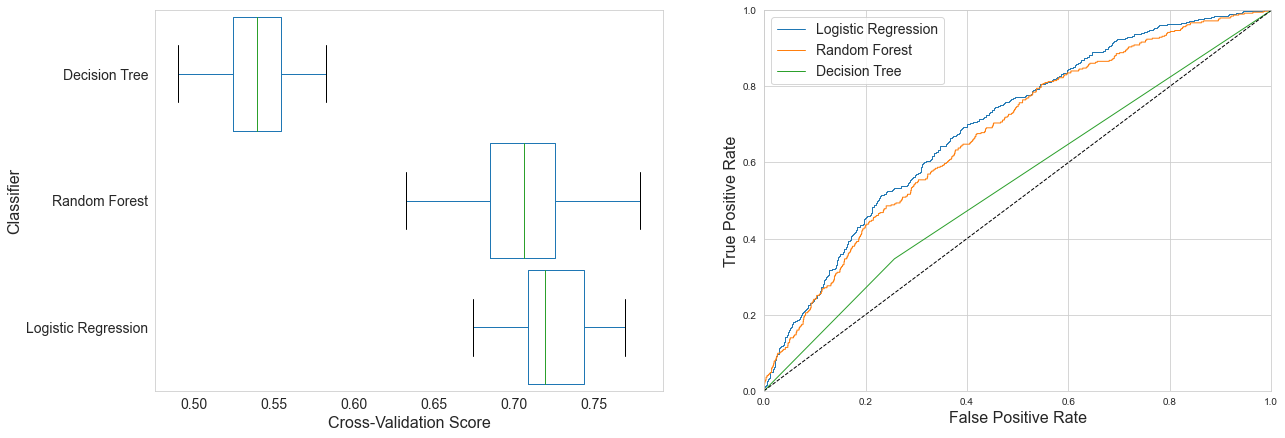

In [42]:
# Plot the box plot for cross validation scores
# Plot the ROC curve for all tested models
# Plot the confusion matrix for the logistic regression
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9), grid=False, vert=False, ax=axes[0],fontsize=14)
ax.set_ylabel('Classifier',fontsize=16)
ax.set_xlabel('Cross-Validation Score',fontsize=16)

for i in range(0, len(tp)):
    axes[1].plot(fp[i], tp[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys(),fontsize=14)
axes[1].set_ylabel('True Positive Rate',fontsize=16)
axes[1].set_xlabel('False Positive Rate',fontsize=16)
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)



#cm = confusion_matrix(y_test, predict).T
#cm = cm.astype('float')/cm.sum(axis=0)

#ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
#ax.set_xlabel('True Value')
#ax.set_ylabel('Predicted Value')
#ax.axis('equal')

## Feature Importance analysis

### Random forest feature importance

In [29]:
#https://mljar.com/blog/feature-importance-in-random-forest/
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_base, y_train)


RandomForestRegressor()

In [30]:
rf.feature_importances_


array([6.28614378e-02, 2.01070915e-02, 8.45876757e-02, 4.19777361e-02,
       1.06645487e-01, 6.43478862e-02, 5.55705440e-02, 8.47945717e-03,
       9.36541268e-02, 6.64779479e-02, 3.22576524e-02, 6.82953284e-03,
       9.38111045e-02, 7.17156788e-02, 8.16204258e-02, 1.48407575e-02,
       1.77197040e-02, 7.64859001e-02, 0.00000000e+00, 9.85393887e-06])

Text(0.5, 0, 'Random Forest Feature Importance')

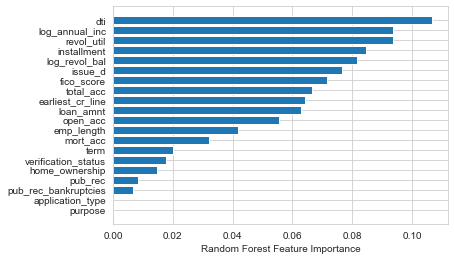

In [32]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train_base.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Permutation feature importance

Permutation Based Feature Importance (with scikit-learn)
The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

The permutation importance can be easily computed:



In [34]:
from sklearn.inspection import permutation_importance

perm_importance = sklearn.inspection.permutation_importance(rf, X_test_base, y_test)

Text(0.5, 0, 'Permutation Importance')

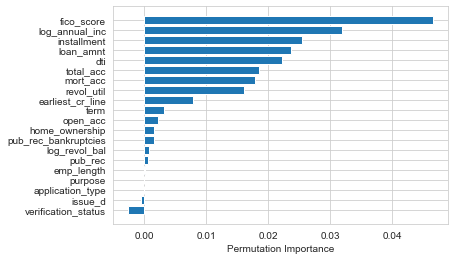

In [36]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test_base.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [37]:
perm_importance.importances_mean[sorted_idx]

array([-0.00257982, -0.00048022,  0.        ,  0.        ,  0.00019551,
        0.00059603,  0.00082148,  0.00150635,  0.00162692,  0.00217823,
        0.00323192,  0.00790302,  0.0160294 ,  0.01786103,  0.01851859,
        0.02218013,  0.02366766,  0.02537576,  0.03185479,  0.04645427])

### Feature Importance Computed with SHAP Values


In [38]:
import shap

In [39]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_base)

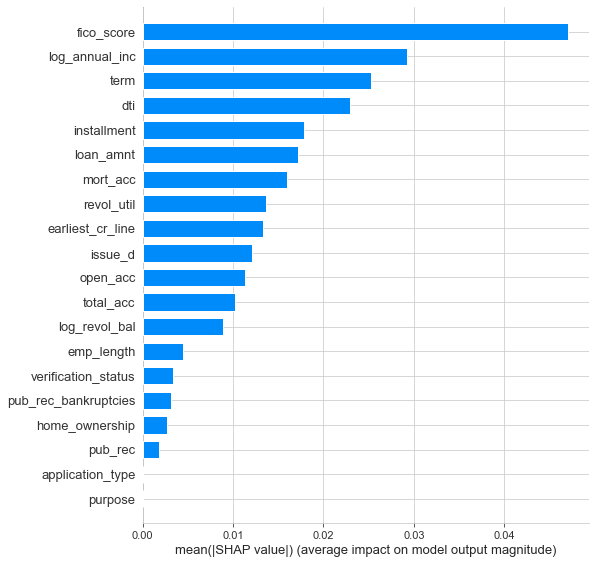

In [40]:
shap.summary_plot(shap_values, X_test_base, plot_type="bar")

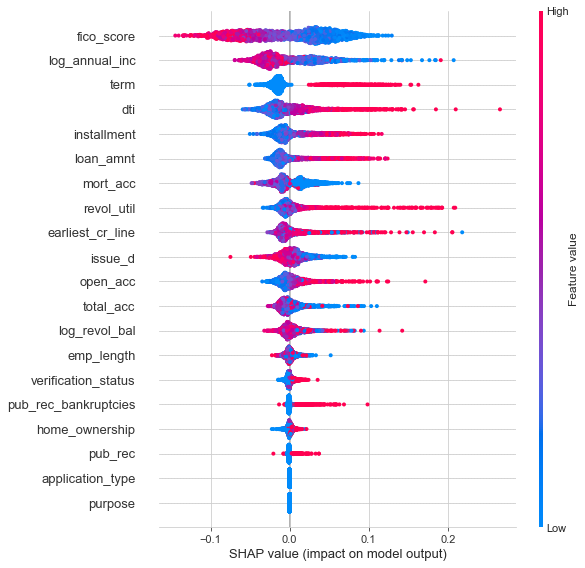

In [41]:
shap.summary_plot(shap_values, X_test_base)

### Mutual Information Score

In [43]:
# Mutual information score

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train_base, y_train, discrete_features)
mi_scores # show a few features with their MI scores


NameError: name 'discrete_features' is not defined

In [ ]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_utility_scores(mi_scores)

# Feature Engineering

**Principal Component Analysis** 


In [44]:
from sklearn.feature_selection import mutual_info_regression
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
        # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores



In [45]:

#We've selected four features that cover a range of properties. Each of these features also has a high MI score with the target, price. We'll standardize the data since these features aren't naturally on the same scale.
features=["dti","log_annual_inc","fico_score","installment","total_acc"]
X_scaled=X_train_base[features]
X_scaled2=X_test_base[features]

In [46]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.662758,-0.278486,0.186795,-0.109952,-0.401135
1,-2.207688,0.564232,0.680239,0.474564,0.651176
2,0.024117,0.358189,-1.399359,-0.360303,0.718837
3,0.579734,-0.553635,0.048700,0.427576,-0.597409
4,-0.874425,0.325765,-0.347298,-0.594366,-0.892426


In [47]:
X_pca2 = pca.fit_transform(X_scaled2)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca2.shape[1])]
X_pca2 = pd.DataFrame(X_pca2, columns=component_names)

X_pca2.head()

,PC1,PC2,PC3,PC4,PC5
0,0.369635,0.605389,0.256820,-1.852639,0.363698
1,0.793339,-1.361089,-2.549365,-0.102546,-0.146252
2,-0.131287,-0.118843,0.562375,-0.593769,0.848231
3,1.418173,1.720550,0.789520,0.621453,0.234578
4,1.079930,-0.535470,-0.006618,-0.130577,-0.147317


In [48]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=features,  # and the rows are the original features
)
loadings

loadings.to_excel("loadings3.xlsx")  

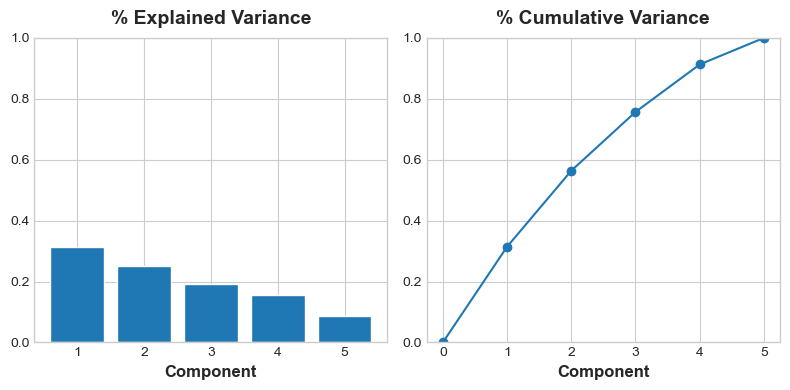

In [49]:
# Look at explained variance
plot_variance(pca);

In [50]:
mi_scores = make_mi_scores(X_pca, y_train, discrete_features=False)
mi_scores

PC3    0.017092
PC2    0.015012
PC1    0.003831
PC5    0.000000
PC4    0.000000
Name: MI Scores, dtype: float64

In [51]:
# Show dataframe sorted by PC3
idx = X_pca["PC2"].sort_values(ascending=False).index
cols = features
X_train_base.loc[idx, cols]

,dti,log_annual_inc,fico_score,installment,total_acc
3333,-1.569623,1.900470,3.195836,0.212310,-0.866403
5982,-1.663628,2.488583,1.807843,3.020859,-1.719700
3869,-1.631500,0.746682,2.943474,0.739181,-1.549041
4779,-1.558914,1.443930,2.943474,2.735581,-0.013107
760,-1.132917,2.449665,3.195836,2.770574,0.498871
...,...,...,...,...,...
4773,2.959273,-0.400169,-1.220505,-0.796206,0.328212
1412,2.216753,-1.749661,-1.220505,-0.274342,1.352168
452,2.872408,-0.672543,-1.220505,-1.007593,0.498871
3526,2.859319,-0.213608,-0.968143,-0.904265,1.864146


In [52]:
X_train_base.columns

Index(['loan_amnt', 'term', 'installment', 'emp_length', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'log_annual_inc', 'fico_score',
       'log_revol_bal', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'application_type'],
      dtype='object')

In [53]:
# To express this contrast, let's create a new ratio feature:
#PCI shows a contrast between loan_amount and dti
#PC2 shows a contrast between fico_score and dti
#PC4 shows a contrast between dti and term
#PC5 contrast between term and fico score
#PC6 contrast between loan_amnt and installment

X_train_base["inc_fico"] = (np.exp(X_train_base.log_annual_inc)) /X_train_base.fico_score
X_train_base["installment_fico"] = X_train_base.installment/X_train_base.fico_score
X_train_base["inc_installment"] = np.exp(X_train_base.log_annual_inc) /X_train_base.installment
X_train_base["inc_total"] = np.exp(X_train_base.log_annual_inc) /X_train_base.total_acc


In [55]:
X_test_base["inc_fico"] = np.exp(X_test_base.log_annual_inc) /X_test_base.fico_score
X_test_base["installment_fico"] = X_test_base.installment/X_test_base.fico_score
X_test_base["inc_installment"] = np.exp(X_test_base.log_annual_inc) /X_test_base.installment
X_test_base["inc_total"] = np.exp(X_test_base.log_annual_inc) /X_test_base.total_acc


In [56]:
# define model
model = RandomForestClassifier(max_features="sqrt",max_depth=3,n_estimators=100)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train_base, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC Random Forest Classifier: %.3f' % np.mean(scores))

Mean ROC AUC Random Forest Classifier: 0.703


In [65]:
modelrf= RandomForestClassifier(max_features="sqrt",max_depth=3,n_estimators=100)
modelrf.fit(X_train_base, y_train)
predict = modelrf.predict(X_test_base)
print(sklearn.metrics.roc_auc_score(y_test, modelrf.predict_proba(X_test_base)[:,1]))


0.6882584406659426


# Enhanced Classification models

We will see that correcting for class imbalances and adjusting the probability threshold for
classification, can help to significantly increase the performance of the model for defaulting loans.

## Balanced

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [61]:
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 5324, 1: 926})


In [62]:
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()

#oversample = SMOTE()
X_balance, y_balance = oversample.fit_resample(X_train_base, y_train)
# summarize the new class distribution
counter = Counter(y_balance)
print(counter)

Counter({0: 5324, 1: 5324})


In [63]:

# Create a best estimate by running the unbalanced dataset through each initial model
# Then scoring the model using 3-fold cross validation
models = {'LR': LogisticRegression(C=1),
          'RF': RandomForestClassifier(n_estimators=100),
         "DT": DecisionTreeClassifier()}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_balance, y_balance, scoring='recall',cv=cv, n_jobs=-1)
    balset[i] = scores
    print(i, scores, np.mean(scores))

LR [0.75399061 0.77840376 0.742723   0.72462406 0.74366197 0.7258216
 0.75680751 0.742723   0.7443609  0.77652582 0.74647887 0.73051643
 0.76056338 0.76033835 0.75586854 0.73896714 0.75868545 0.75492958
 0.75093985 0.75023474 0.75962441 0.73896714 0.7370892  0.77067669
 0.73051643 0.78122066 0.73896714 0.76901408 0.71804511 0.74741784
 0.75117371 0.74741784 0.75774648 0.75657895 0.73239437 0.74366197
 0.75023474 0.74460094 0.74342105 0.75492958 0.74741784 0.74929577
 0.76431925 0.72744361 0.74741784 0.77089202 0.75117371 0.73051643
 0.74906015 0.74647887] 0.7490975678633203
RF [0.88732394 0.91361502 0.89201878 0.875      0.90140845 0.88920188
 0.89295775 0.88732394 0.8843985  0.90610329 0.88732394 0.89014085
 0.88826291 0.89567669 0.90704225 0.89859155 0.89201878 0.89765258
 0.88909774 0.89389671 0.89671362 0.89201878 0.87699531 0.89379699
 0.89859155 0.88262911 0.89389671 0.89953052 0.89661654 0.90328638
 0.89483568 0.88732394 0.90046948 0.90413534 0.89014085 0.89295775
 0.88075117 0.

In [64]:
modelrf= RandomForestClassifier(n_estimators=100)
modelrf.fit(X_balance, y_balance)
predict = modelrf.predict(X_test_base)
print(sklearn.metrics.roc_auc_score(y_test, modelrf.predict_proba(X_test_base)[:,1]))


0.6592935999467956


In [65]:

# Fitting the model to the balanced data
model = RandomForestClassifier(max_features="sqrt",max_depth=3,n_estimators=100)
model.fit(X_balance, y_balance)
predict = model.predict(X_test_base)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.92      0.48      0.63      2284
           1       0.20      0.76      0.32       395

    accuracy                           0.52      2679
   macro avg       0.56      0.62      0.47      2679
weighted avg       0.81      0.52      0.58      2679



(0.0, 2.0, 2.0, 0.0)

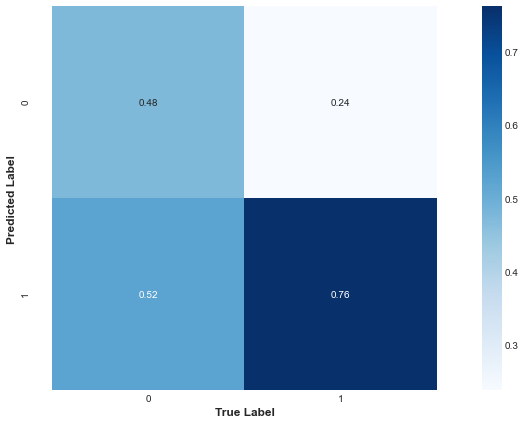

In [67]:
# Plotting the confusion matrix for the logistic regression model for the testing data
predict = model.predict(X_test_base)
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

## Applying Randomized Search to Balanced dataset

In [89]:
# Hyperparameters for Random Forest - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
# Number of trees in random forest
n_estimators = [2000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion=['gini', 'entropy']
class_weight = ["balanced"]

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [90]:
# Set grid search params

grid_params_lr ={'clf__penalty': ['l1', 'l2'], 
                 'clf__C': list(np.logspace(-5,5,10)), 
                 #'clf__solver': ["lbfgs",'newton-cg'],
                 "clf__max_iter": [500,1000,3000],
                 "clf__class_weight": class_weight
                } 

grid_params_rf ={ 
    'clf__n_estimators': n_estimators,
    'clf__max_features': max_features,
    #'clf__max_depth' : max_depth,
    'clf__criterion' :criterion,
    'clf__class_weight': class_weight,
    'clf__min_samples_split': min_samples_split,
    #'clf__min_samples_leaf': min_samples_leaf,
    #'clf__bootstrap': bootstrap
}


grid_params_dt = {'clf__criterion': ['gini', 'entropy'],
                  #'clf__splitter': ["best", "random"],
                   'clf__max_depth': max_depth,
                  'clf__class_weight': class_weight,
                  'clf__min_samples_split': min_samples_split}
                  #'clf__min_samples_leaf': min_samples_leaf}


In [92]:
kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [98]:
# Random Forest

rf = RandomForestClassifier(max_features="sqrt",max_depth=3,n_estimators=100)
pipeline = Pipeline([('clf', rf)])

RF = RandomizedSearchCV(pipeline, grid_params_rf, scoring = 'roc_auc', cv = kf,return_train_score=True,n_iter=100,n_jobs=-1)
   
RF.fit(X_train_base, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('clf',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=3,
                                                                     max_features='sqrt',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impur

In [117]:
np.mean(pd.DataFrame(RF.cv_results_)["mean_train_score"])

0.7351256457247871

In [111]:
 
 
modelrf= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=3000, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
modelrf.fit(X_train_base, y_train)
predict = modelrf.predict(X_test_base)
print(sklearn.metrics.roc_auc_score(y_test, modelrf.predict_proba(X_test_base)[:,1]))

0.691307721297302


In [93]:
# Logistic Regression

lr = LogisticRegression()
pipeline2 = Pipeline([('clf', lr)])

LR = RandomizedSearchCV(pipeline2, grid_params_lr, scoring = 'roc_auc', cv = kf,return_train_score=True,n_iter=100,n_jobs=-1)
   
LR.fit(X_train_base, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('clf',
                                              LogisticRegression(C=1.0,
                                                                 class_weight=None,
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                 max_iter=100,
                                                                 multi_class='auto',
                                                                 n_jobs=None,
                                             

In [94]:
LR.best_score_

0.7234091910076782

In [95]:
LR.best_estimator_


Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=0.021544346900318846,
                                    class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [118]:
np.mean(pd.DataFrame(LR.cv_results_)["mean_train_score"])

0.7147376059121788

In [96]:
# Decision Tree
dt = DecisionTreeClassifier()
pipeline3 = Pipeline([('clf', dt)])

DT = RandomizedSearchCV(pipeline3, grid_params_dt, scoring = 'roc_auc', cv = kf,return_train_score=True,n_iter=100,n_jobs=-1)
   
DT.fit(X_train_base, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('clf',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
                                                                     min_impurity_split=None,
                                                           

In [97]:
DT.best_estimator_

Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [ ]:
print('Best LR test AUC: %.3f' % LR.best_score_)
print('Best RF test AUC: %.3f' % RF.best_score_)
print('Best DT test AUC: %.3f' % DT.best_score_)

In [ ]:
print('Best DT test AUC: %.3f' % DT.best_score_)

Best DT test AUC: 0.608


In [119]:
np.mean(pd.DataFrame(DT.cv_results_)["mean_train_score"])

0.9813590636759331

In [121]:

# Create a best estimate by running the unbalanced dataset through each initial model
# Then scoring the model using 3-fold cross validation
models = {'LR':  LogisticRegression(C=0.021544346900318846,
                                    class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False),
          'RF':RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=3000, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
         "DT": DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best')}

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_unbalance - np.min(X_unbalance) + 1, y_unbalance, scoring='roc_auc',cv=cv)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

LR [0.73012054 0.72267986 0.68125872 0.74545362 0.73785775 0.70724527
 0.71795457 0.72988199 0.72575054 0.73284016 0.71702576 0.71775155
 0.69569344 0.75288923 0.72965175 0.6815531  0.76654739 0.73211014
 0.70859028 0.7222138  0.71168126 0.70767669 0.72303007 0.7378759
 0.72877254 0.70631138 0.70689506 0.71679736 0.73681005 0.73716044
 0.71678721 0.71270651 0.74041873 0.72053293 0.7213649  0.74140845
 0.71546758 0.69709428 0.71559447 0.74688233 0.71863977 0.72955209
 0.69672884 0.7217815  0.74714508 0.70238295 0.74585966 0.70563127
 0.70354524 0.72963154] 0.7219447111445496
RF [0.70783911 0.70401218 0.66658546 0.72546631 0.70804026 0.69287654
 0.69531785 0.71863469 0.71390433 0.69870745 0.7074889  0.68973481
 0.68821216 0.72085268 0.70269424 0.66964091 0.73489151 0.71326989
 0.70844817 0.6910017  0.70093135 0.67795965 0.69465804 0.72073087
 0.72282521 0.70015988 0.68728842 0.7016876  0.70466692 0.7182725
 0.68735947 0.68734932 0.72587235 0.7019566  0.68284118 0.73263799
 0.693983   0.6

In [122]:
# Computing the ROC curves for the models and finding the true positive (TP) and false positives (FP)
tp_unbalset, fp_unbalset = createROC(models, X_unbalance - np.min(X_unbalance) + 1, y_unbalance, X_test_base - np.min(X_test_base) + 1, y_test)

In [132]:


# Fitting LR to the test set
model1 = LogisticRegression(C=0.021544346900318846,
                                    class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
model1.fit(X_unbalance, y_unbalance)
predict1 = model1.predict(X_test_base)
print(sklearn.metrics.roc_auc_score(y_test,predict1))

0.6325339732647586


In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict1))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      2284
           1       0.28      0.48      0.35       395

    accuracy                           0.74      2679
   macro avg       0.59      0.63      0.59      2679
weighted avg       0.81      0.74      0.76      2679



In [134]:
model2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=3000, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
model2.fit(X_unbalance, y_unbalance)
predict2 = model2.predict(X_test_base)
print(sklearn.metrics.roc_auc_score(y_test,predict2))

0.6407540623822298


In [135]:
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      2284
           1       0.24      0.61      0.35       395

    accuracy                           0.67      2679
   macro avg       0.58      0.64      0.56      2679
weighted avg       0.81      0.67      0.71      2679



In [136]:
model3 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best')
model3.fit(X_unbalance, y_unbalance)
predict3 = model3.predict(X_test_base)
print(sklearn.metrics.roc_auc_score(y_test,predict3))

0.5714779755702852


In [137]:
print(classification_report(y_test, predict3))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2284
           1       0.21      0.41      0.28       395

    accuracy                           0.68      2679
   macro avg       0.54      0.57      0.54      2679
weighted avg       0.78      0.68      0.72      2679



(0.0, 1.0)

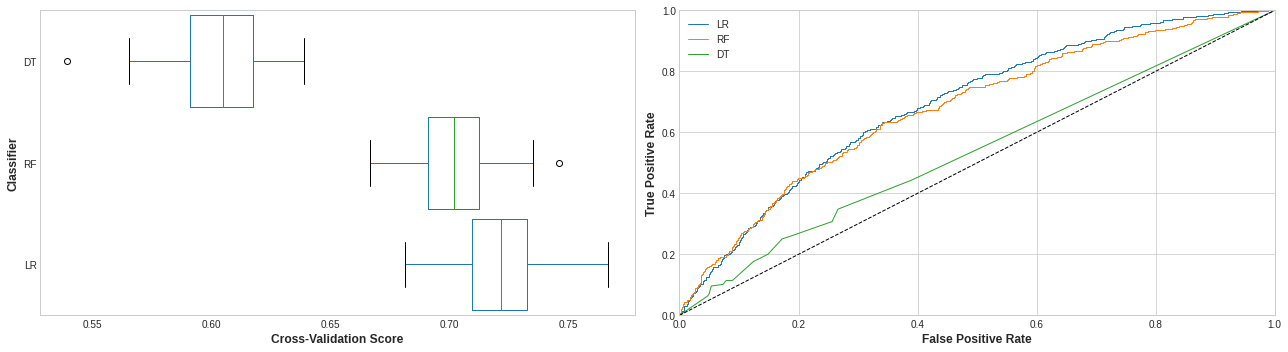

In [129]:
# Plot the box plot for cross validation scores
# Plot the ROC curve for all tested models
# Plot the confusion matrix for the logistic regression
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)


In [138]:
# TP and FP from the testing set
fp, tp, threshold = sklearn.metrics.roc_curve(y_test, model2.predict_proba(X_test_base)[:,1])

Text(0, 0.5, 'True Positive & False Positive Rates')

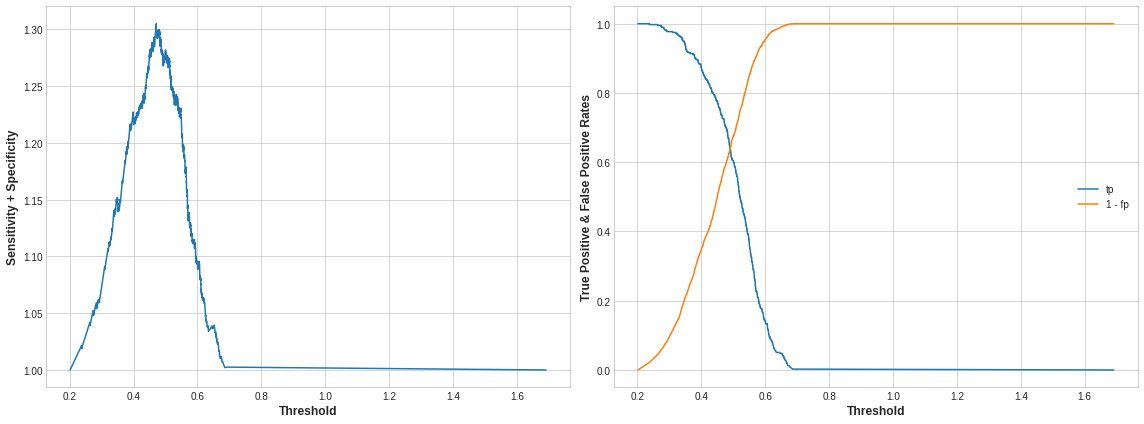

In [139]:
# Plotting the threshold for TP and FP rates 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1 - fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')

In [140]:
# Identify the optimal threshold for the model
function = tp + (1 - fp)
index = np.argmax(function)

optimal_threshold = threshold[np.argmax(function)]
print('optimal threshold:', optimal_threshold)

optimal threshold: 0.471094749241736


(0.0, 2.0, 2.0, 0.0)

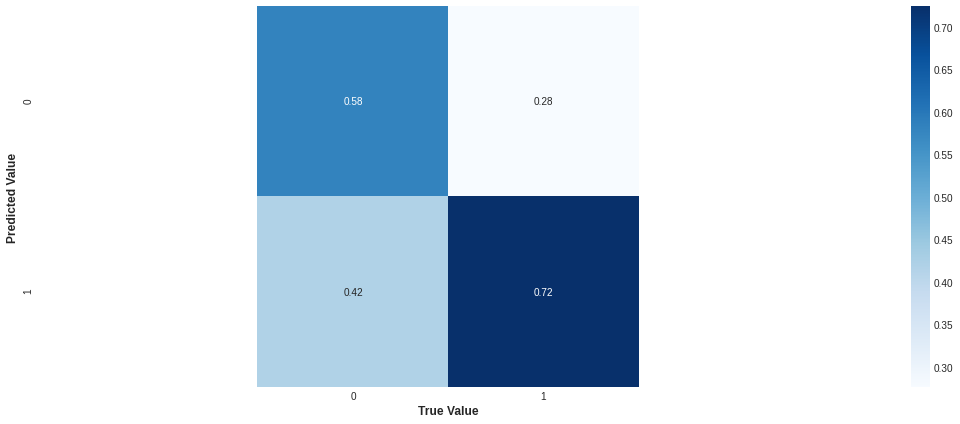

In [143]:
predict = model2.predict_proba(X_test_base)[:,1]
predict = np.where(predict >= optimal_threshold, 1, 0)

fig, axes = plt.subplots(figsize=(15,6))

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')